# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>


<h1 align="center">Interrogación 2</h1> 


## Instrucciones Generales:

* Esta Interrogación cuenta de **dos partes**: una sección de preguntas de alternativas en Canvas (Parte I), y una sección de trabajo práctico con datos (Parte II) que debe responder en este mismo Notebook.<br>

* En la Parte II, cada pregunta requiere un pequeño **código**, y una **respuesta de texto corta (1-3 líneas)**.<br>


* El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. <br>

* La entrega de la interrogación se realizará a través de Github.<br>


* Esta Interrogación debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.<br>

* Está **estrictamente prohibido comunicarse con sus compañeros de curso o terceras personas** durante el desarrollo de esta interrogación.<br>

* Puede consultar documentación online y apuntes de todo tipo.<br>


* Ud. dispone de 1h 45m para desarrollar esta interrogación (Parte I y II).<br>

* Recuerde **guardar frecuentemente sus avances en su repositorio personal de Github (save/commit/push)** para evitar pérdidas de trabajo o problemas de envío.<br>

***
## Introducción.


Continuando con el caso de estudio de la **Tarea 2**, suponga que ud.está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

Para ello, se ha realizado web scraping de la red Linkedin para extraer los datos de ofertas de empleo en *data science* publicados todos los países de sudamérica, para construir una base de datos más amplia para su estudio.  Los datos han sido integrados, limpiados y procesados, generando así un conjunto de datos apto para distintos tipos de análisis.

Ahora, ud. desarrollará el análisis exploratorio y modelamiento inicial de los datos. El objetivo final, es construir un modelo predictivo del salario mensual de los puestos de trabajo en ciencia de datos en base a las características y requisitos del cargo.


## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el archivo `datosI2.csv` incluido en este repositorio.

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: tres años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.
* `SalaryUSD`: salario mensual en dólares

**Nota**: estos datos han sido parcialmente simulados para efectos de este ejercicio, no los utilice para ninguna toma de decisión real.



In [56]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df=pd.read_csv('datos_I2.csv')
df

,Country,Title,Company,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,Data Scientist,BICE VIDA,1,3,6,6.683722,2621
1,Chile,Data Scientist,BNamericas,0,3,7,10.035329,2195
2,Chile,Data Scientist.,Fuerza Laboral,1,4,9,4.988700,3474
3,Chile,Data Scientist,Agrosuper,0,3,7,1.766855,2195
4,Chile,Data Scientist,MAS Analytics,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...
995,Guyana,Lead Ruby on Rails Engineer,Aha!,1,1,4,5.924260,606
996,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,1,6,10,4.856359,1570
997,Guyana,Sr. Ruby on Rails Engineer,Aha!,0,1,5,6.040759,449
998,Guyana,Sr. Ruby on Rails Engineer,Aha!,0,2,7,4.944933,696


In [6]:
df.columns

Index(['Country', 'Location', 'Title', 'Company', 'Url', 'CountryScore',
       'English', 'EducationLevel', 'YearsExperience', 'CompanyScore',
       'SalaryUSD'],
      dtype='object')

### 1. ¿Cómo se distribuyen los datos de empleos por país?

Genere un gráfico de barras que muestre claramente esta distribución. Además comente, ¿Están balanceados los datos, o puede identificar algún(os) países para los cuales los datos sean poco representativos?

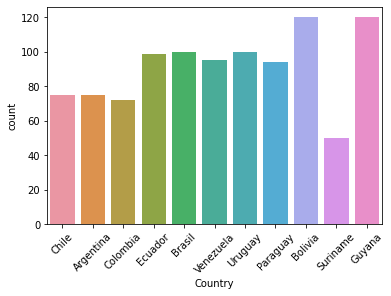

In [57]:
sns.countplot(data=df,x='Country')
plt.xticks(rotation=45);

En general los datos están bastante balanceados. Podría argumentarse una sobrerrepresentación de Guyana, si se toma en consideración su baja población. Hay una menor representación de Surinam, lo cual también es consistente con su baja población.


### 2. Estudie la distribución de salarios en el dataset, y analice la existencia de datos anómalos.

**a)** Genere un histograma para la variable *SalaryUSD*, incluyendo una curva de densidad de probabilidad (kde).<br>
**b)** ¿Puede identificar valores fuera de rango o anómalos? ¿Por qué son anómalos, y a qué países corresponden?<br>
**c)** ¿Qué tratamiento daría ud. a esos datos anómalos? (Ej: nada, eliminar, corregir, etc.) Justifique e implemente su propuesta. 

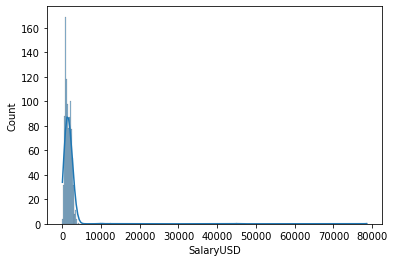

In [58]:
sns.histplot(data=df, x="SalaryUSD", kde=True);
#plt.yscale('log')

In [59]:
df[df['SalaryUSD']>9000]

,Country,Title,Company,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
835,Suriname,Database Reliability Engineer (Remote),Percona,1,3,6,7.340831,78600
838,Suriname,Frontend Developer (Angular),Kingfisher Recruitment,1,4,8,8.187684,9801
844,Suriname,Back-end Developer,Kingfisher Recruitment,1,4,8,6.665769,9870
940,Guyana,Sr. Platform Engineer,Aha!,0,1,5,4.971855,44900
953,Guyana,Sr. Software Engineer,Univision,0,5,10,7.120389,12340


Valores fuera de rango: `SalaryUSD > 95000`. Se asume error para salarios > 40000. Valores sobre USD9500 podría ser reales, pero son pocos datos e influirían en un eventual modelo predictico Propuesta: eliminar
    

In [60]:
df=df[df['SalaryUSD']<9500]

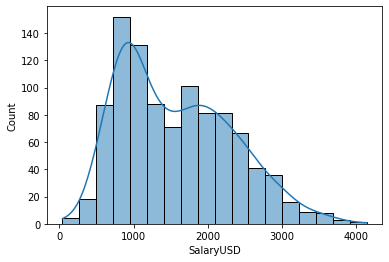

In [61]:
sns.histplot(data=df, x="SalaryUSD", kde=True);


### 3. ¿Cómo se comparan en general los salarios promedio de Cientistas de Datos por país? 

**a)** Genere un gráfico de cajas y una tabla resumen que muestre la media y  dispersión de los salarios para cada país. <br>
**b)** Analice y comente: ¿Cuáles son los países con mayores y menores salarios medios?

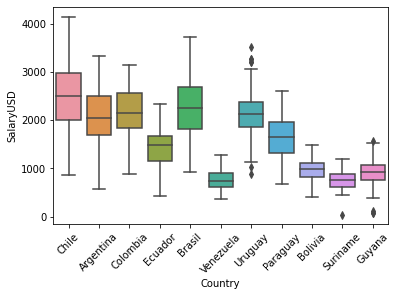

In [35]:
sns.boxplot(data=df,y='SalaryUSD',x='Country');
plt.xticks(rotation=45);

### 4. ¿Influye el manejo del idioma inglés en los salarios? ¿Influye (o no) de la misma manera para todos los países?

Genere un gráfico y/o resumen estadístico que le permitan responder fundadamente esta pregunta, y argumente su respuesta.


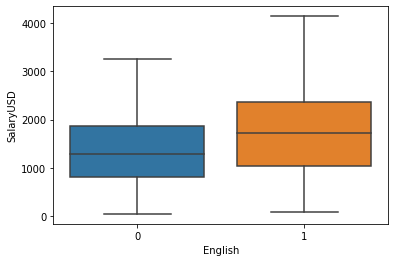

In [39]:
sns.boxplot(data=df,y='SalaryUSD',x='English');

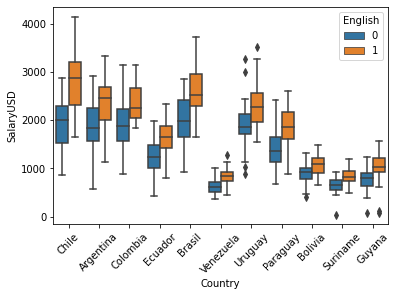

In [38]:
sns.boxplot(data=df,y='SalaryUSD',x='Country',hue='English');
plt.xticks(rotation=45);

En todos los países, el sueldo medio de los trabajos que requieren inglés es mayor que el los que no lo requieren.


### 5. Analice los coeficientes de correlación entre `SalaryUSD` y otras variables del dataset.  

**a)** Calcule y grafique la matriz de correlación para las variables numéricas del dataset.

**b)** ¿Cuáles variables identifica como más relevantes para construir un modelo predictivo de salarios? Justifique brevemente su respuesta.


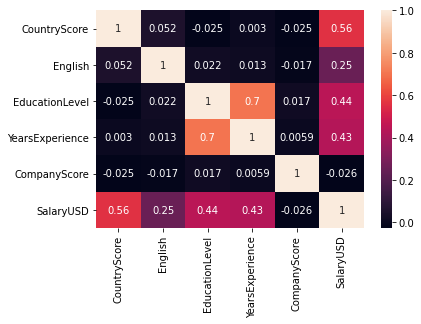

In [17]:
sns.heatmap(df.corr(), annot=True);

Al considerar los datos de todos los países juntos, los índices de correlación obetnidas son bastante bajos, pareciera no haber ninguna correlación lineal significativa.

### 6.  Analice los coeficientes de correlación entre `SalaryUSD` y otras variables del dataset, *para un país en particular*.

**a)** Seleccione los registros del Dataframe correspondientes a Chile, y calcule nuevamente la matriz de correlación para este subconjunto de los datos.

**b)** ¿Cómo varían sus resultados respecto a la matriz de confusión calculada con todos los datos en el punto 5? 


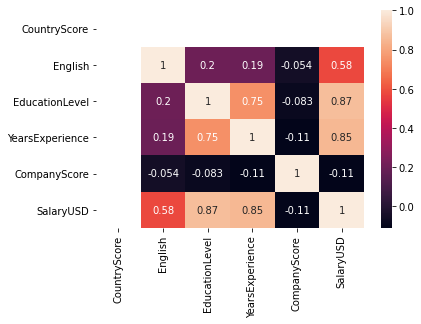

In [40]:
col=df[df['Country']=='Chile']
sns.heatmap(col.corr(),annot=True);

Al considerar sólo un país, se obtiene correlaciones más significativas entre variables.

### 7. Genere un modelo de regresión multilineal para predecir los salarios de empleos en Ciencia de Datos.

**a)** Indique claramente las variables predictoras a incluir en su modelo de regresión, justificando su elección.<br>
**b)** Entrene un modelo regresión lineal utilizando la librería `sklearn`, y considerando todo el conjunto de datos. <br>
**c)** Evalúe el rendimiento del modelo entrenado y, comente: ¿qué tan bueno o malo es el ajuste multilineal? ¿cuál es la importancia relativa de las distintas variables predictoras?<br>
**d)** Repita los puntos **b)** y **c)**, ahora sólo con los datos correspondientes a **Chile** .¿Cómo cambian sus resultados respecto a la regresión obtenida para el conjunto de datos completo?<br>

a) Variables: 
- 'English'
- 'EducationLevel'
- 'YearsExperience'
- 'CompanyScore' (opcional)

In [41]:
# b)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


y=df['SalaryUSD']
X=df[['English','EducationLevel','YearsExperience']]

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)


In [42]:
#c) 

from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(Xtrain, ytrain)

R2_test=reg.score(Xtest,ytest)
print('R2_test',R2_test)

y_pred_test=reg.predict(Xtest)
rmse=mean_squared_error(ytest,y_pred_test)
print('RMSE_test:',rmse)



R2_test 0.30647865012723163
RMSE_test: 400290.7461235973


In [46]:
#d)

df2=df[df['Country']=='Chile']
y=df2['SalaryUSD']
X=df2[['English','EducationLevel','YearsExperience','CompanyScore']]

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)

reg = LinearRegression().fit(Xtrain, ytrain)

R2_test=reg.score(Xtest,ytest)
print('R2_test',R2_test)

y_pred_test=reg.predict(Xtest)
rmse=mean_squared_error(ytest,y_pred_test)
print('RMSE_test:',rmse)



R2_test 0.9999998369438252
RMSE_test: 0.07110506865505728


El país es una variable deteminante del modelo. No es posible ajustar un modelo de regreión multilineal único para todos los países, sino que necesario un modelo distinto para cada uno, o incluir en la regresión una variable dummy que preresente al país.
